命中次数(hit_count): 10
是否进入刹车阶段(brake_on): True
仿真结束时间: 176.02 s


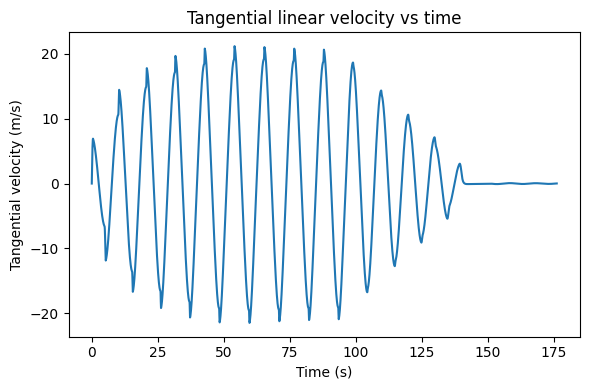

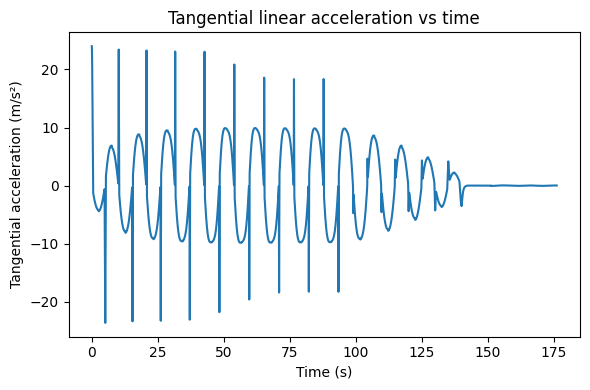

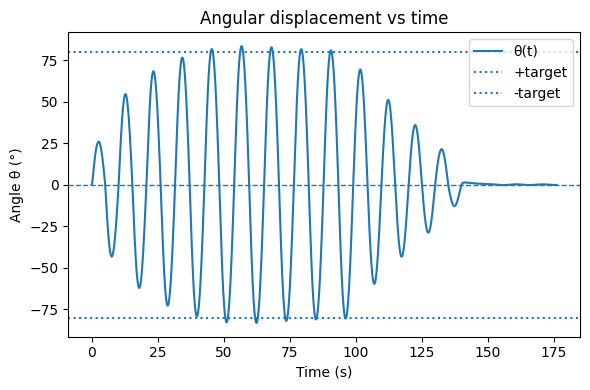

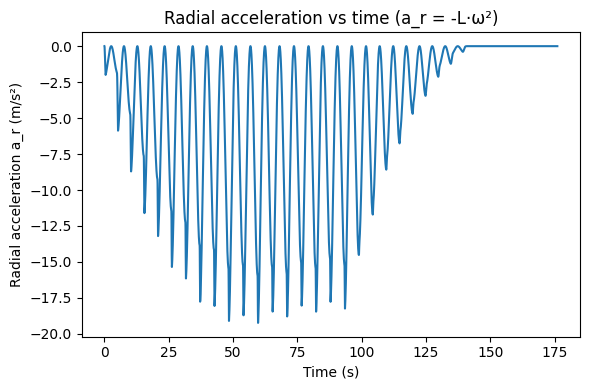

In [ ]:
# 在 Jupyter 中运行（确保 pendulum_sim.py 与此 Notebook 同目录）
import math
import matplotlib.pyplot as plt
from pendulum_sim import Params, simulate

# === 参数 ===
p = Params(
    m=250.0, L=24.0, g=9.81,
    kappa0=0.03, c_t=10.0,
    F0=6000.0,
    theta_on_deg=5.0,
    theta_target_deg=80.0,
    dt=0.002, t_max=200.0,
    n_hits=10, hit_decay=0.95, F0_min_frac=0.80,
    peak_eps_deg=0.5,
    theta_tol_deg=0.2, omega_tol_deg=0.2,
    quiet_time=5.0,
    brake_after_hits=10,           
    theta_brake_on_deg=5.0,
    F_brake0=1000.0,
    omega_eps=0.05,
    theta_eps_deg=0.3,
    stall_timeout=60.0,
    stall_cycles=4,
    theta0_deg=0.0,
    omega0_deg=0.0
)

# === 调用仿真 ===
res = simulate(p)

T = res["T"]
v_t = res["v_t"]
a_t = res["a_t"]
theta_deg = res["theta_deg"]
a_r = res["a_r"]

print("命中次数(hit_count):", res["meta"]["hit_count"])
print("是否进入刹车阶段(brake_on):", res["meta"]["brake_on"])
print("仿真结束时间:", round(res["meta"]["sim_end_time"], 3), "s")

# === 画图 ===
plt.figure(figsize=(6,4))
plt.plot(T, v_t)
plt.xlabel("Time (s)"); plt.ylabel("Tangential velocity (m/s)")
plt.title("Tangential linear velocity vs time"); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(T, a_t)
plt.xlabel("Time (s)"); plt.ylabel("Tangential acceleration (m/s²)")
plt.title("Tangential linear acceleration vs time"); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(T, theta_deg, label='θ(t)')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axhline(p.theta_target_deg, linestyle=':', label='+target')
plt.axhline(-p.theta_target_deg, linestyle=':', label='-target')
plt.xlabel("Time (s)"); plt.ylabel("Angle θ (°)")
plt.title("Angular displacement vs time"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(T, a_r)
plt.xlabel("Time (s)"); plt.ylabel("Radial acceleration a_r (m/s²)")
plt.title("Radial acceleration vs time (a_r = -L·ω²)"); plt.tight_layout(); plt.show()
